# ML in Life Sciences - Class 3: Advanced Techniques

**Semester:** 2024.2

---
This notebook is part of the crash course "Machine Learning in Life Sciences" aimed at graduate students in biological sciences. The class is divided into three parts:

**Part I:** Dimensionality Reduction, including the curse of dimensionality, feature selection, and feature extraction techniques such as PCA.

**Part II:** Clustering, covering clustering concepts and methods such as K-means, hierarchical clustering, and DBSCAN, along with practical examples.

**Part III:** Introduction to Classification, focusing on the K-Nearest Neighbors (KNN) algorithm and its application in classification tasks.

---
**Prof.** Ignacio Sánchez-Gendriz

**Date:** September 5, 2024

[![Abrir no Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1eW9E22ixTmgAh1jC6ux-5VHno-mBsDl-?authuser=1)


## **Part I: Dimensionality Reduction**

## Part I: Dimensionality Reduction

### 1. Concepts

#### **Curse of Dimensionality**

The curse of dimensionality refers to a set of phenomena that arise when analyzing and organizing data in high-dimensional spaces. As the number of dimensions (features) increases, several challenges emerge:

- **Increased Computational Cost:** With higher dimensions, the computational resources required for processing data and running algorithms grow exponentially. This is because many algorithms, such as distance-based methods, need to compute operations across all dimensions, leading to higher computational complexity.

- **Data Sparsity:** In high-dimensional spaces, data points become sparse. This means that the volume of the space increases so quickly that the available data becomes sparse. As a result, the distances between points become less informative, making it difficult for models to identify meaningful patterns.

- **Distance Metrics Become Less Informative:** In high dimensions, the concept of distance becomes less useful. For instance, the difference between the nearest and farthest neighbors diminishes, making it challenging for algorithms that rely on distance metrics (e.g., K-nearest neighbors).

- **Overfitting:** Models with too many features can become overly complex and fit the noise in the training data rather than capturing the underlying patterns. This often leads to poor generalization to new, unseen data.

- **Visualization Challenges:** High-dimensional data is difficult to visualize and interpret. Human cognition is limited to visualizing data in up to three dimensions, so visualizing high-dimensional data often requires dimensionality reduction techniques.




### **Example:**
To illustrate the curse of dimensionality, consider the following example. We will generate random samples in varying dimensions and analyze how the mean pairwise Euclidean distance changes:

1. Generate 100 uniform random samples in one-dimensional space (range 0 - 1).
2. Generate 100 uniform random samples in a two-dimensional space (square with side length \(L = 1\)).
3. Extend this to 3, 4, up to 10 dimensions.
4. Compute the mean pairwise Euclidean distance for each dimension.
5. Plot the mean pairwise distance against the number of dimensions to visualize how distances change with increasing dimensionality.

This example will help illustrate how the distance metrics become less informative and how the curse of dimensionality impacts data analysis.

In [ ]:
#!pip install latex

In [ ]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rc

import pandas as pd
import numpy as np
import seaborn as sns

# Set Seaborn style and context for academic plots
sns.set_style("whitegrid", {'grid.linestyle': '--'})  # White background with dashed grid lines
sns.set_context("paper")  # Adjust context to "talk" or "poster" for presentations

# Enable TeX mode for high-quality text rendering
mpl.rcParams['font.family'] = 'serif'

# Configure high-resolution figures for publication quality
plt.rcParams['figure.dpi'] = 300

# Configure legend aesthetics
plt.rcParams["legend.facecolor"] = "white"
plt.rcParams["legend.edgecolor"] = "black"
mpl.rcParams['legend.framealpha'] = 1  # Full opacity for better readability

# Adjust figure size for clarity
plt.rcParams['figure.figsize'] = [8, 6]  # Width, height in inches

# Set error bars and line properties for better visibility
mpl.rcParams['errorbar.capsize'] = 2  # Error bar cap size in points
mpl.rcParams['lines.linewidth'] = 2  # Line width for better clarity

# Save figures with high resolution
mpl.rcParams['savefig.dpi'] = 300

# Configure axes spines
plt.rcParams['axes.edgecolor'] = 'black'  # Set the border of the axes to black
plt.rcParams['axes.linewidth'] = 0.5  # Set the width of the axes border

In [ ]:
from sklearn.metrics import pairwise_distances

def mean_pairwise_distance(data):
    """
    Compute the mean pairwise Euclidean distance between samples in the dataset.

    This function calculates the pairwise Euclidean distances between all samples
    in the input data and returns the mean of these distances.

    Parameters:
    ----------
    data : numpy.ndarray
        A 2D array of shape (n_samples, n_features) where `n_samples` is the number of
        samples and `n_features` is the number of features.

    Returns:
    -------
    float
        The mean pairwise Euclidean distance between samples.

    Example:
    -------
    >>> data = np.array([[1, 2], [4, 6], [7, 8]])
    >>> mean_pairwise_distance(data)
    5.212473
    """
    # Compute pairwise Euclidean distances
    distances = pairwise_distances(data, metric='euclidean')

    # Number of samples
    num_samples = data.shape[0]

    # Calculate mean pairwise distance
    mean_distance = np.sum(distances) / (num_samples * (num_samples - 1))

    return mean_distance


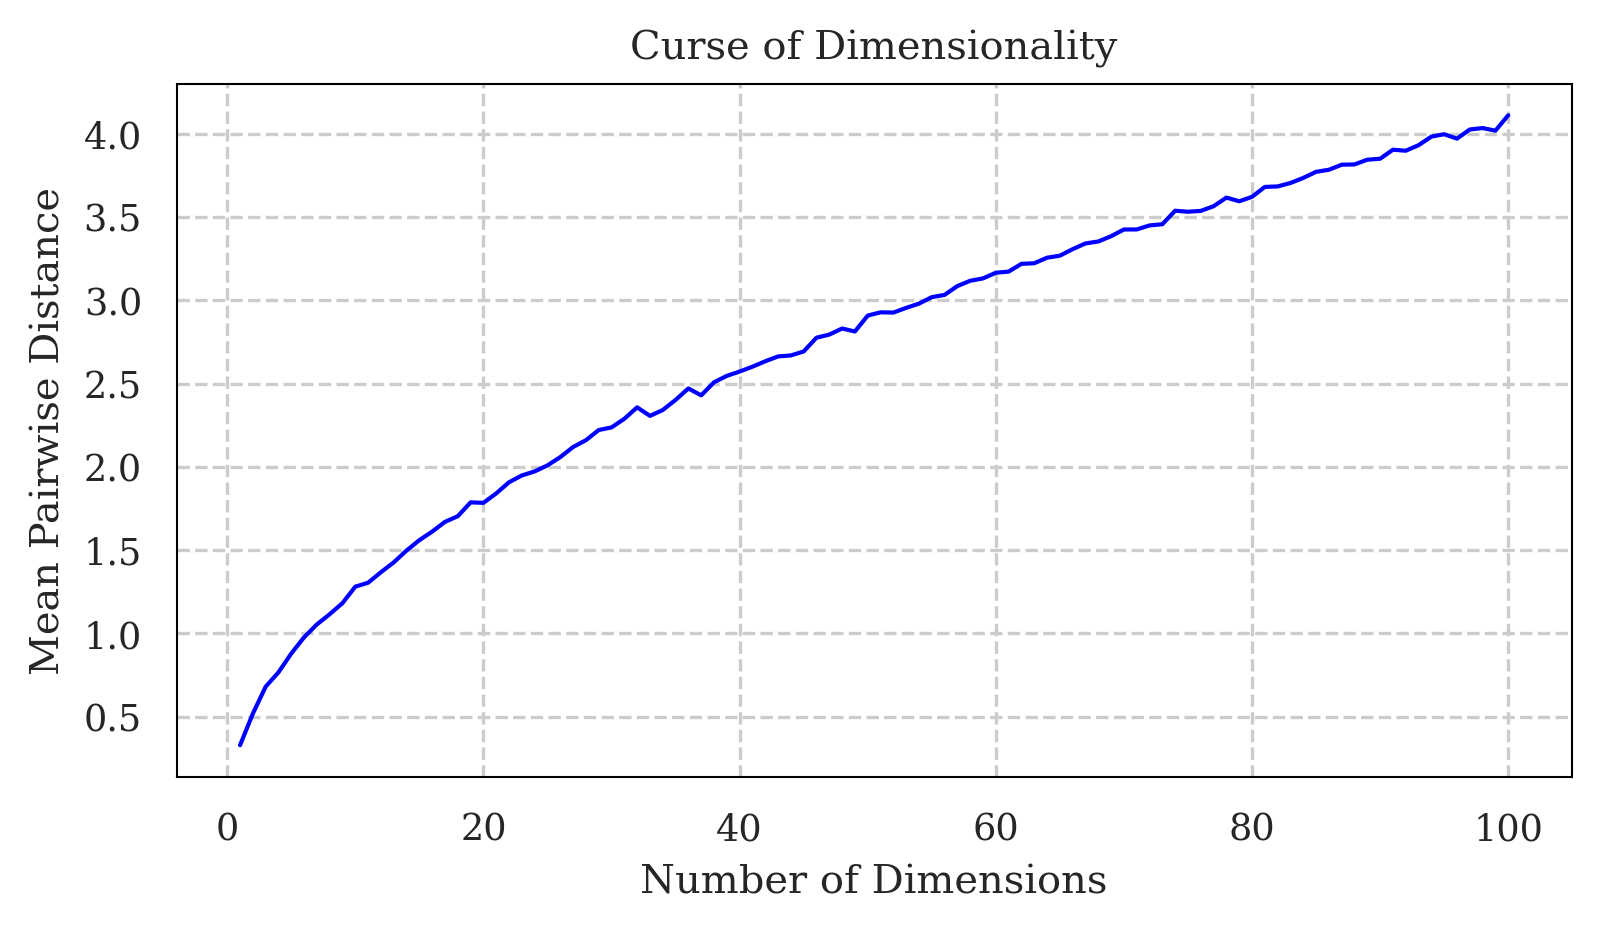

In [ ]:
# Generate and analyze data in varying dimensions
# Define a range of dimensions from 1 to 100
dimensions = range(1, 101)

# Initialize an array to store mean pairwise distances for each dimension
mean_distances = np.zeros(len(dimensions))

# Iterate over each dimension value
for idx, dim in enumerate(dimensions):
    # Generate a dataset with 100 samples and the current dimension
    data = np.random.uniform(0, 1, size=(100, dim))

    # Compute the mean pairwise Euclidean distance for the current dataset
    mean_distance = mean_pairwise_distance(data)

    # Store the computed mean distance in the corresponding position in the array
    mean_distances[idx] = mean_distance

# Plotting the results
plt.figure(figsize=(6, 3))
plt.plot(dimensions, mean_distances,linewidth=1, color = 'b')
plt.xlabel('Number of Dimensions')
plt.ylabel('Mean Pairwise Distance')
plt.title('Curse of Dimensionality')
plt.grid(True)
plt.show()

**Discussion on the Curse of Dimensionality**

The graph shown here illustrates an important concept in data science known as the "Curse of Dimensionality." This phenomenon occurs when we work with data in high-dimensional spaces, meaning spaces with many features or variables.

In this plot, we observe how the mean pairwise distance between randomly generated points changes as the number of dimensions increases. Starting with $ n = 1 $, the average distance between points is about 0.33. However, as we increase the number of dimensions to $ n = 100 $, the average distance rises significantly to 4.03.

What this tells us is that in high-dimensional spaces, data points tend to become far apart from each other, even when they might be close or neighbors in a lower-dimensional space. This spread in distances makes it difficult for machine learning algorithms that rely on distance metrics—such as clustering or nearest-neighbor classification—to identify meaningful patterns. Essentially, as dimensions increase, the space becomes so large that the data points are spread thinly, making it hard to discern relationships between them.

In biological sciences, this could mean that when analyzing complex datasets with many variables (such as gene expression levels, protein concentrations, etc.), simply increasing the number of features without careful consideration can make it challenging to detect meaningful clusters or patterns. To manage this, we often use dimensionality reduction techniques, like Principal Component Analysis (PCA), to reduce the number of dimensions while retaining the essential information, making the data easier to interpret and analyze.

Understanding the Curse of Dimensionality emphasizes the importance of not just collecting more data, but also focusing on the most relevant features that truly capture the biological processes we aim to study.

### Dimensionality Reduction Techniques

In machine learning, one of the significant challenges we face is dealing with high-dimensional data—datasets with a large number of features or variables. This is often referred to as the "Curse of Dimensionality," which, as we discussed earlier, leads to increased computational costs, difficulties in model training, and the sparseness of data points in high-dimensional spaces. As dimensionality increases, data points become more spread out, making it harder for algorithms to detect meaningful patterns and relationships.

**Why is Dimensionality Reduction Important?**

Dimensionality reduction is a critical step in data preprocessing that helps to tackle these issues by reducing the number of features while preserving the most important information in the dataset. The main goals of dimensionality reduction include:

- **Improving Model Performance:** By reducing irrelevant or redundant features, models can train faster and perform better, avoiding overfitting to noise in the data.
- **Reducing Computational Cost:** Lowering the number of dimensions reduces the time and computational power needed for data processing and model training.
- **Enhancing Data Visualization:** It becomes easier to visualize and interpret data by reducing it to two or three dimensions, allowing us to see patterns and relationships that are otherwise hidden in high-dimensional space.

**Types of Dimensionality Reduction**

There are two primary approaches to dimensionality reduction:

1. **Feature Selection:** This technique involves selecting a subset of the most important features from the original dataset based on certain criteria. The aim is to keep only the features that contribute the most to the predictive power of the model while discarding the less relevant ones. Feature selection can be done in a supervised manner, where the importance of features is evaluated based on their relationship with the target variable (e.g., using Fisher score), or in an unsupervised manner, where features are selected based on their inherent properties (e.g., using Variance Thresholding).

2. **Feature Extraction:** Unlike feature selection, feature extraction creates new features by transforming the original data into a lower-dimensional space. This approach involves combining existing features into new, fewer features that still capture the essence of the data. A common example of feature extraction is Principal Component Analysis (PCA), which uses linear transformations to project data into a lower-dimensional space by identifying the directions (principal components) that maximize variance in the data.

Both of these approaches serve the purpose of simplifying the dataset, making it more manageable and interpretable while preserving its most critical aspects. By reducing dimensionality, we not only alleviate the challenges posed by high-dimensional data but also improve the efficiency and performance of machine learning models in identifying meaningful patterns and making accurate predictions.

In the following sections, we will dive deeper into specific techniques for feature selection and feature extraction, providing practical implementations to illustrate how these methods work in real-world scenarios.

### Fisher Score: A Supervised Feature Selection Strategy

The Fisher Score is a widely used supervised feature selection method that ranks features based on their ability to distinguish between different classes. It selects features by aiming to minimize the variability within the same class (denoted as $ S_W $) while maximizing the separation between different classes (denoted as $ S_B $). In other words, it prefers features that are consistent within each class and distinct between different classes. This approach is particularly valuable when we want to improve the discriminative power of a machine learning model by focusing on the most informative features, making it easier to classify or differentiate between groups such as different species, conditions, or experimental treatments.

#### Fisher Score Computation

The Fisher Score $ F_j $ for a feature $ j $ quantifies how well that feature separates different classes by using the ratio of between-class variance ($ S_B^j $) to within-class variance ($ S_W^j $). This ratio essentially measures how distinct the classes are compared to the internal variability within each class. The Fisher Score is computed as follows:

Given a dataset with $ c $ classes, we define the following terms explicitly:
- $ \mu_j $ is the overall mean of the feature values across all samples in the dataset, regardless of class. It represents the average value of feature $ j $ across the entire dataset.
- $ \mu_j^k $ is the mean of the feature values within the $ k $-th class. It represents the average value of feature $ j $ specifically for samples belonging to class $ k $.
- $ \sigma_j^k $ is the standard deviation of the feature values within the $ k $-th class, indicating how spread out the feature values are within that class.
- $ n_k $ is the number of samples in the $ k $-th class, showing the size of each class.

A high Fisher Score for a feature $ j $ indicates that the average values of this feature are different between classes (high $ S_B^j $) and consistent within each class (low $ S_W^j $), making it a strong candidate for distinguishing between different classes.

The Fisher Score for the $ j $-th feature is calculated using:

\begin{align}
F_j &= F(x_j) = \frac{S_B^j}{S_W^j}, j = {1,2, \cdots n}
\end{align}

where:
- $n$ is the number of features
- ($ S_B^j $) represented in the numerator is the **Between-Class Variance**. This term quantifies the variance between the class means and the overall mean, emphasizing how distinct the classes are with respect to the feature $j$.

\begin{align}
  S_B^j &= \sum_{k=1}^{c} n_k (\mu_j^k - \mu_j)^2
\end{align}

Between-Class Variance ($ S_B^j $) measures how far apart the average values of each class are from the overall average value of the feature. When $ S_B^j $ is high, it means that the classes are well-separated, as their average values differ significantly from each other. For instance, if a feature like gene expression levels shows distinct averages between conditions (e.g., healthy vs. diseased), it will have a high Between-Class Variance.

- ($ S_W^j $) represented in the denominator is the **Within-Class Variance**. This term captures the variability within each class, penalizing features with high internal variability.

\begin{align}
  S_W^j &= \sum_{k=1}^{c} n_k (\sigma_j^k)^2
\end{align}

Within-Class Variance ($ S_W^j $) measures how spread out the feature values are within each class. A lower $ S_W^j $ indicates that the feature values are consistent within each class, showing little variation among the samples of the same class. For example, if gene expression levels are very similar within a group (such as healthy individuals), the Within-Class Variance will be low.

By ranking features based on their Fisher Scores, we can identify and select those features that offer the best separation between classes. Specifically, high Fisher Scores occur when $ S_B^j $ is large (indicating strong separation between classes) and $ S_W^j $ is small (indicating consistency within classes). This makes the feature highly valuable for classification tasks, as it provides a clear distinction between classes while maintaining stability within each class.

#### Practical Considerations

The Fisher Score evaluates each feature independently, which can lead to suboptimal feature sets if considered alone. This method does not account for feature interactions or redundancy, which means it might overlook combinations of features that together provide significant class separability. Despite this, Fisher Score remains a robust, straightforward criterion that often serves as a starting point in feature selection due to its simplicity and effectiveness in many applications.

This approach is particularly relevant in fields such as biological sciences, where selecting the right features (e.g., specific genes, proteins) is crucial for building models that can accurately classify different conditions or phenotypes. Understanding and applying the Fisher Score can help you enhance your machine learning models by focusing on the most relevant data, thereby improving both interpretability and predictive performance.

By using Fisher Scores, you can ensure that your analysis focuses on features that are not only distinct between classes but also consistent within classes, making them reliable markers for the phenomena you're studying. This helps improve the clarity and accuracy of your models, making them more effective tools for classification and prediction in biological research.


In [ ]:
def fisher_score_metric(X, classes_label):
    """
    Calculate the Fisher Score for each feature in the dataset.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n_samples, n_features).
    classes_label (numpy.ndarray): Array of class labels of shape (n_samples,).

    Returns:
    numpy.ndarray: Fisher Scores for each feature of shape (n_features,).
    """
    # Obtain the unique classes from the class labels
    unique_classes = np.unique(classes_label)

    # The number of classes and features
    n_classes = len(unique_classes)
    n_features = X.shape[1]  # Correctly obtain the number of features

    # Initialize the Fisher Score array for each feature
    f_score = np.zeros(n_features)

    # Loop over each feature to calculate its Fisher Score
    for j in range(n_features):
        X_j = X[:, j]  # Extract the current feature across all samples
        # Compute the overall mean of the current feature
        mean_j = np.mean(X_j)

        # Initialize Between-Class Variance (S_B_j) and Within-Class Variance (S_W_j)
        S_B_j = 0  # Between-Class Variance
        S_W_j = 0  # Within-Class Variance

        # Loop over each class to compute Between-Class Variance (S_B_j) and Within-Class Variance (S_W_j)
        for k, class_k in enumerate(unique_classes):
            # Get indices of samples belonging to the current class
            idx_samples = classes_label == class_k
            # Number of samples in the current class
            n_k = np.sum(idx_samples)
            # Extract feature values for the current class
            X_j_k = X_j[idx_samples]

            # Compute mean and standard deviation for the current class and feature
            mean_j_k = np.mean(X_j_k)
            std_j_k = np.std(X_j_k)

            # Compute Between-Class Variance contribution for this class
            S_B_j += n_k * (mean_j_k - mean_j) ** 2

            # Compute Within-Class Variance contribution for this class
            S_W_j += n_k * (std_j_k) ** 2

        # Calculate Fisher Score for the current feature
        f_score[j] = S_B_j / S_W_j

    return f_score

### Practical Example

In this practical example, we will use a real dataset to implement feature selection methods, aiming to understand the concepts we have discussed. The dataset contains the percentages of pregnant women categorized by race across different regions of Brazil. In our first attempt, we will plot the percentage of 'Branca' (White) vs. 'Preta' (Black) to see if there are any insights that can be drawn from the plot. In this case, the features were selected heuristically, based on human experience and intuition.

This approach helps us explore and visualize the data before applying more systematic feature selection techniques.

See the link:
https://colab.research.google.com/drive/1Wix4vzW1z97oAzQ6Mujc7IsIR3bGGppS?usp=sharing


In [ ]:
# df = pd.read_csv('Syphilis_Cases_Races.csv')
# data = df.iloc[:, 2:].values

# # Split data into 5 blocks, each of shape (6, 13)
# blocks = np.split(data, 5)

# # Concatenate blocks along the columns (axis=1)
# result = np.concatenate(blocks, axis=1).T

# Cor = df['Raça ou Cor'].values[:6]

# # Create a DataFrame with 'result' as data, and 'Cor' as column names
# df_result = pd.DataFrame(data=result, columns=Cor)

# # Define the regions
# regions = ['Norte', 'Nordeste', 'Centro', 'Sudeste', 'Sul']

# # Repeat each region 13 times and expand the list to match the length of the DataFrame
# region_column = np.repeat(regions, 13)

# # Add the 'Region' column to the DataFrame
# df_result['Region'] = region_column

# df_result.to_csv('syphilis_data.csv', index=False)

# df = df_result

In [ ]:
df = pd.read_csv('syphilis_data.csv')
df

,Branca,Preta,Amarela,Parda,Indígena,Ignorada,Region
0,8.8,6.3,1.1,79.1,1.7,3.1,Norte
1,11.4,8.5,2.5,72.3,1.6,3.7,Norte
2,9.6,6.8,0.9,78.9,2.1,1.6,Norte
3,8.7,8.3,0.9,77.5,2.0,2.7,Norte
4,10.0,6.6,0.7,78.5,1.7,2.5,Norte
...,...,...,...,...,...,...,...
60,67.1,9.3,0.7,16.4,0.5,6.1,Sul
61,67.8,8.9,0.6,16.6,0.7,5.3,Sul
62,67.7,8.6,0.6,16.5,0.6,5.9,Sul
63,66.7,9.8,0.7,16.4,0.5,6.0,Sul


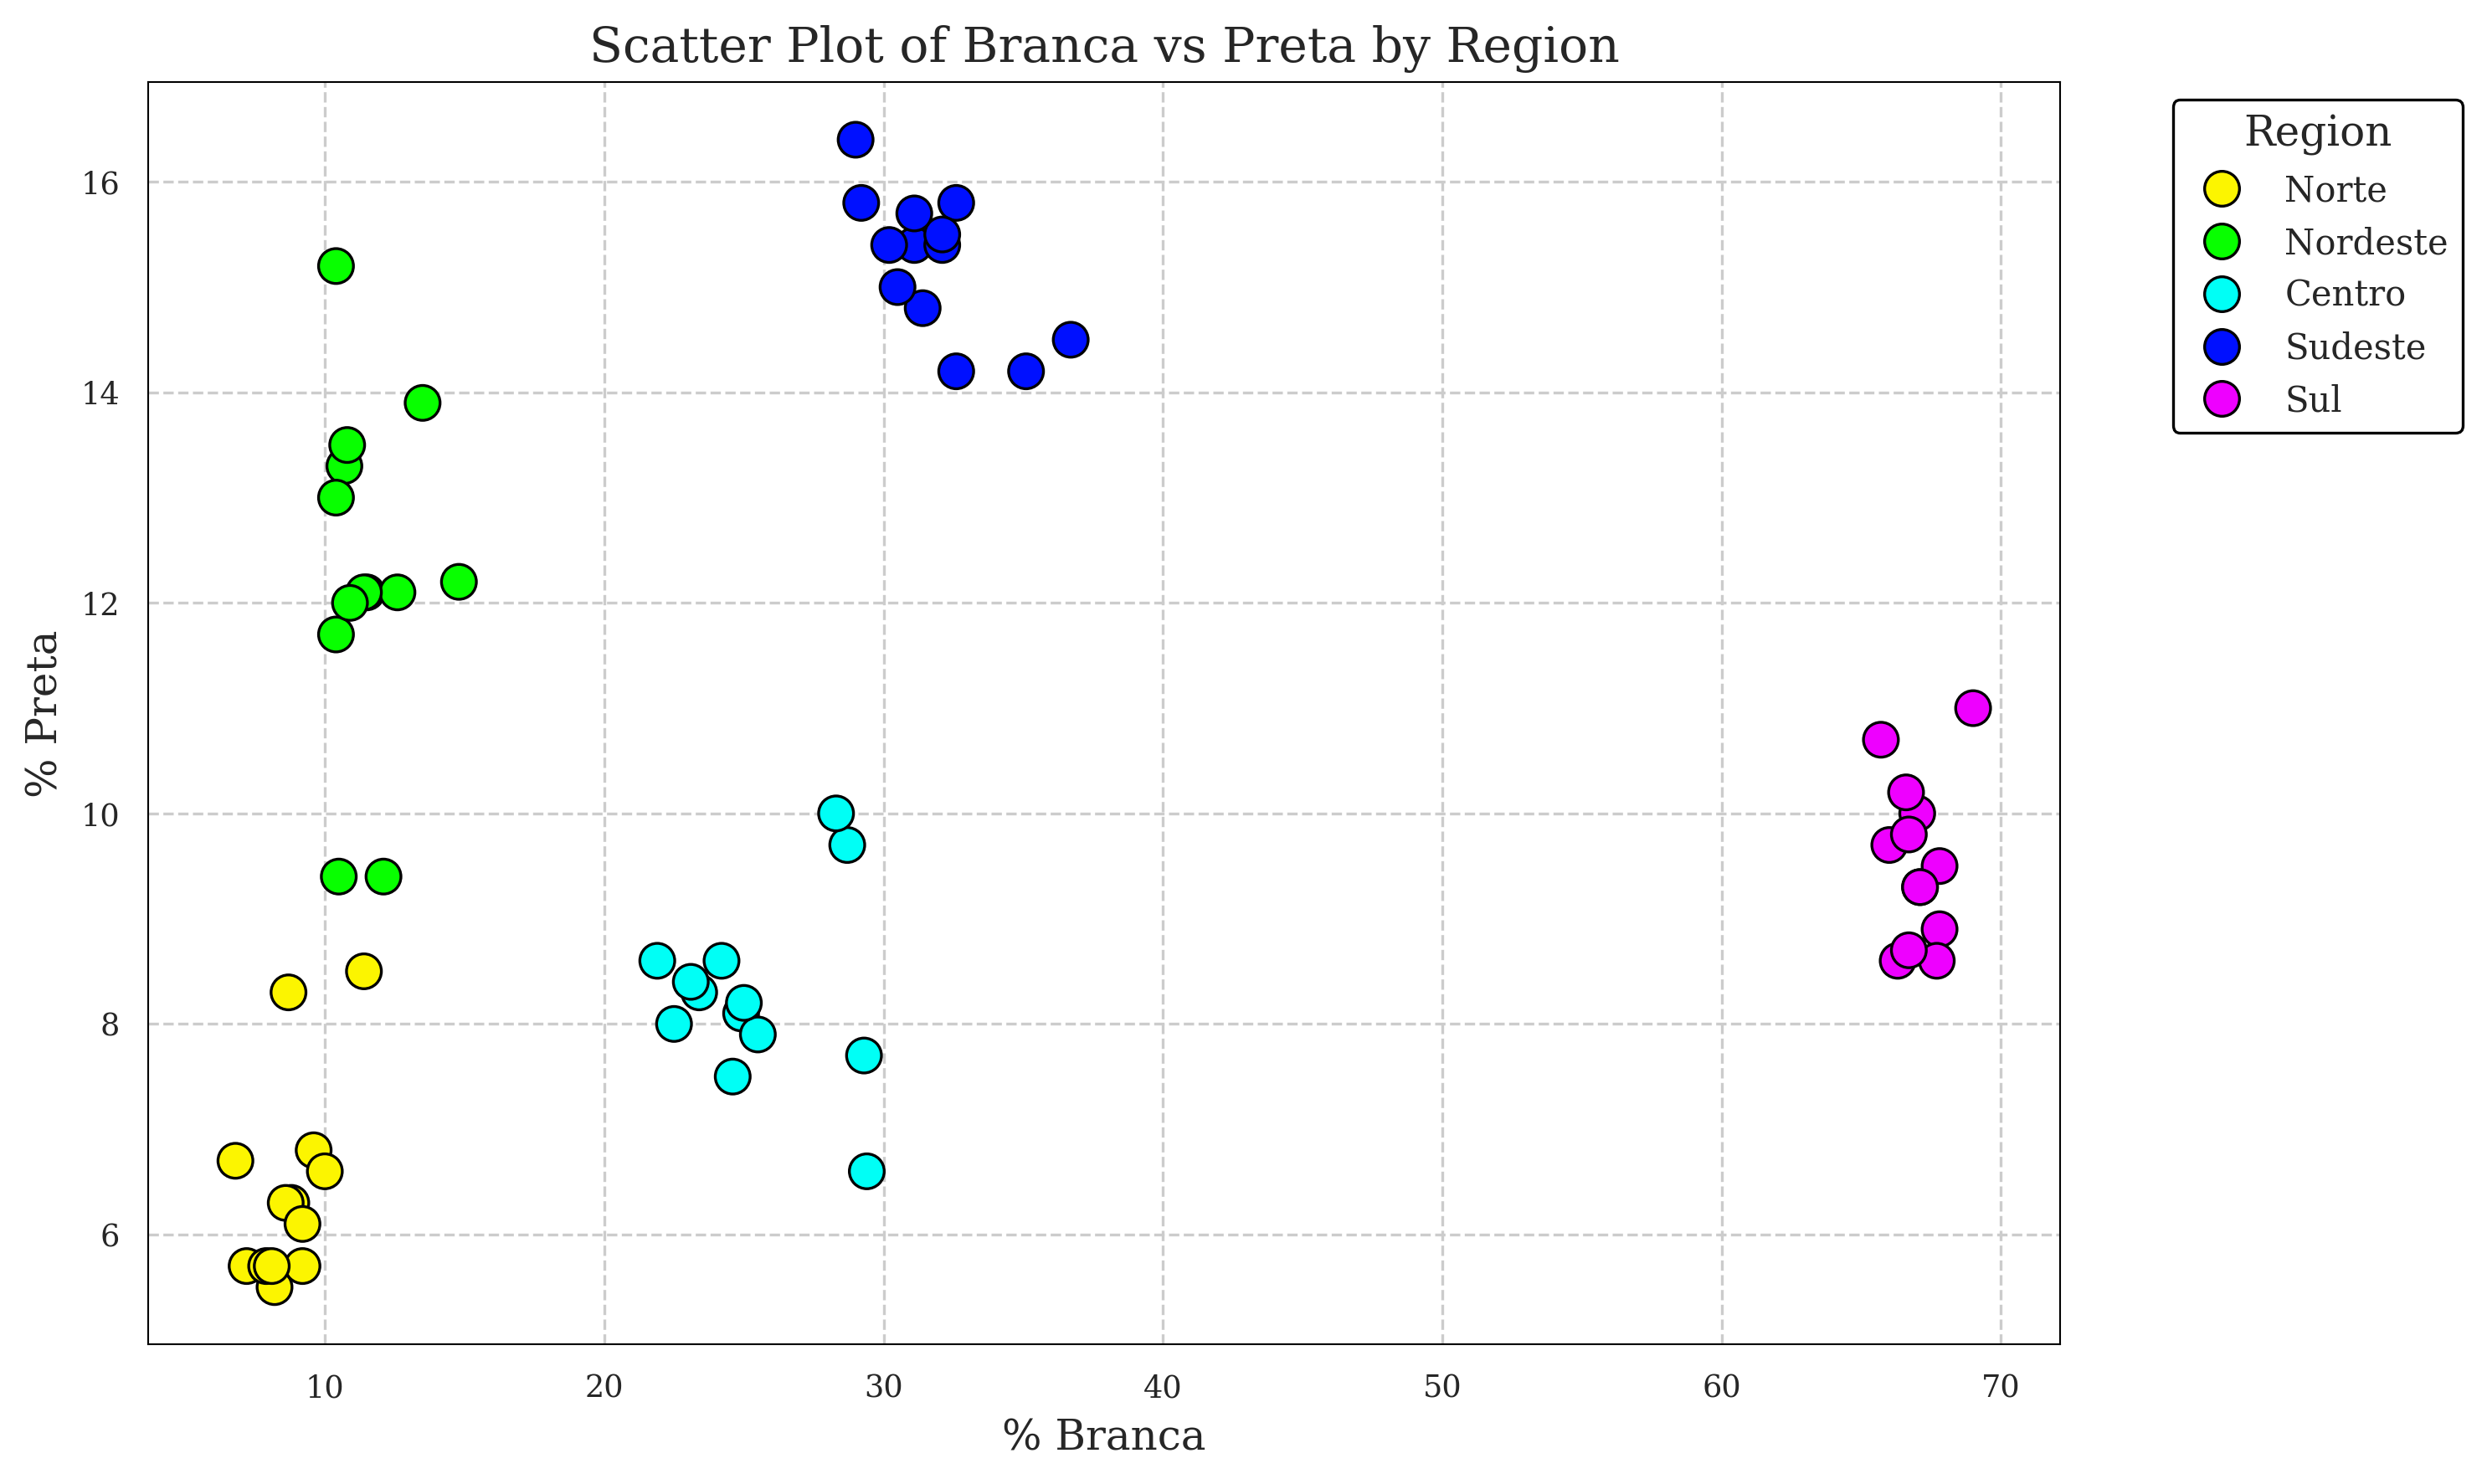

In [ ]:
# Plotting the scatter plot for 'Branca' vs 'Preta' with colors representing regions
plt.figure(figsize=(10, 6))
# sns.set(style="whitegrid")

# Define the color palette for the regions
palette = sns.color_palette('hsv', len(df['Region'].unique()))

# Scatter plot for 'Branca' vs 'Preta', colored by 'Region'
sns.scatterplot(data=df, x='Branca', y='Preta', hue='Region', palette=palette, s=100, edgecolor='k')

# Set plot labels and title
plt.xlabel('% Branca', fontsize=12)
plt.ylabel('% Preta', fontsize=12)
plt.title('Scatter Plot of Branca vs Preta by Region', fontsize=14)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


### Plot selected Races by Feature selection

The method used will be the Fisher Score



In [ ]:
# get data matrix
X = df.iloc[:,:-1].values
labels = df.iloc[:,-1].values


fisher_score = fisher_score_metric(X, labels)
features = df.columns[:-1]

# Get indices in descending order by negating the scores
sorted_indices = np.argsort(-fisher_score)

print(f"🔍 Features ordered by importance: {', '.join(features[sorted_indices])}")



🔍 Features ordered by importance: Branca, Parda, Preta, Ignorada, Indígena, Amarela


ummm, it seems that 'Parda' should be better than 'Preta', what do you think?

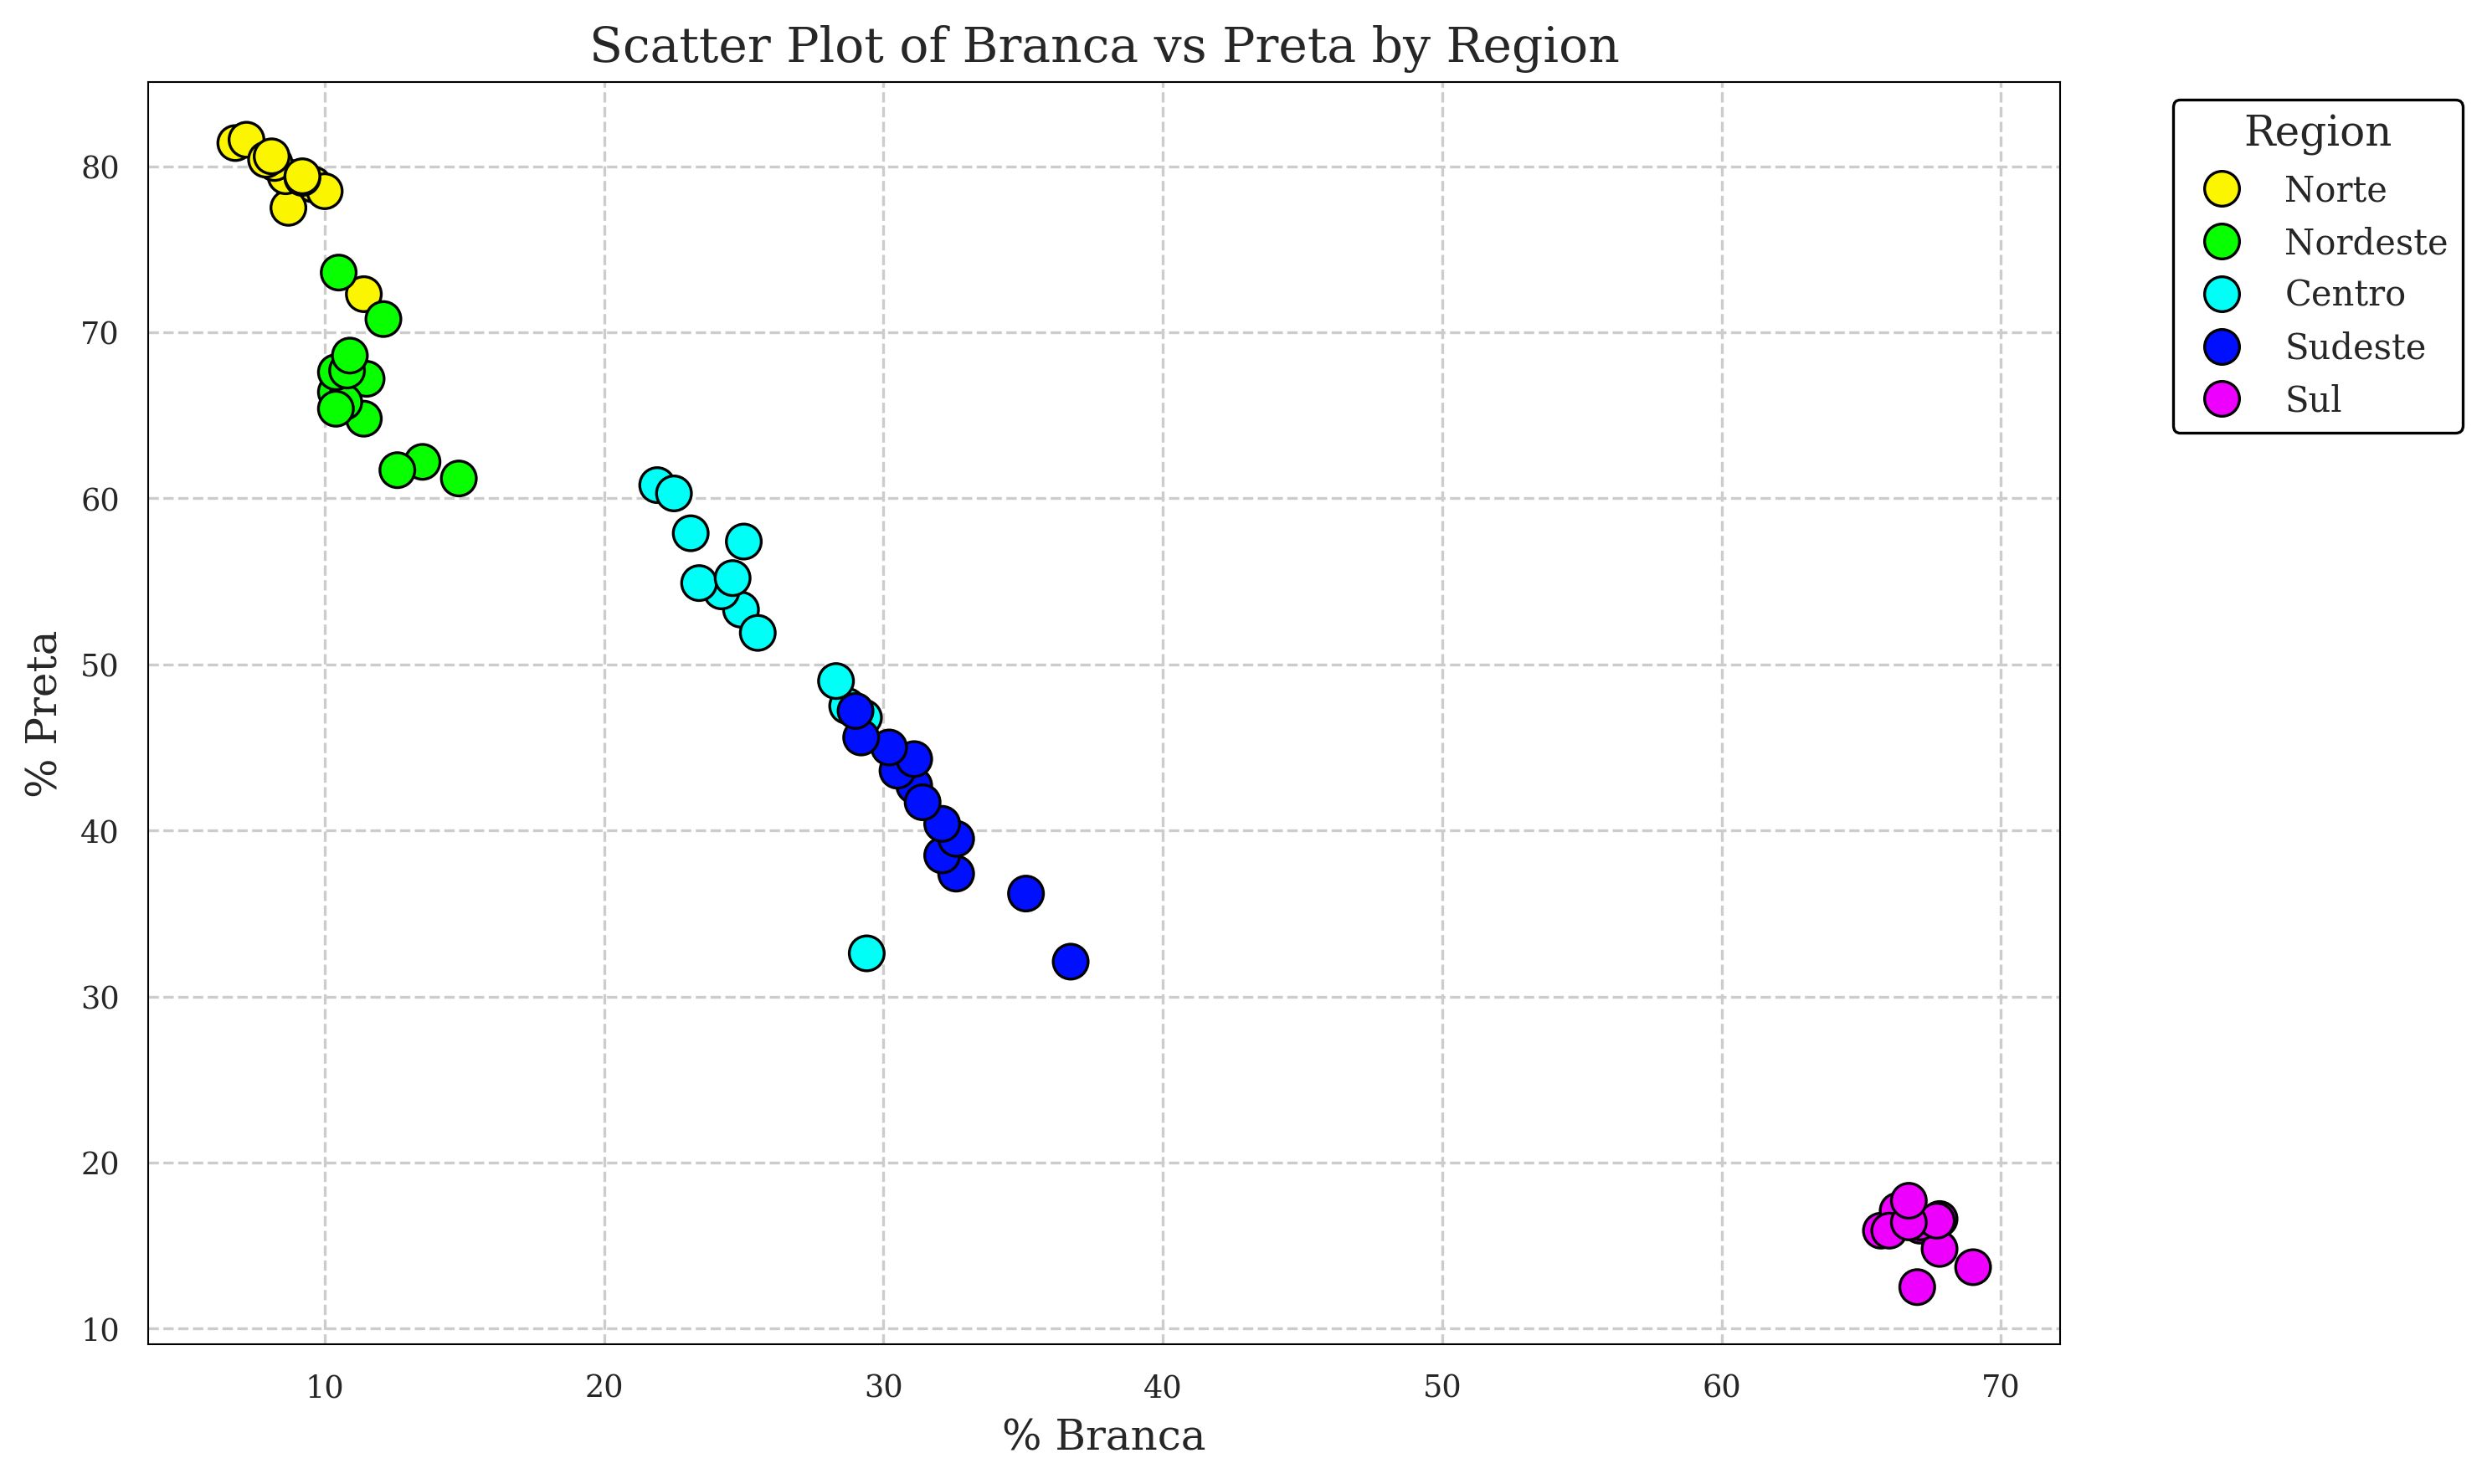

In [ ]:
# Plotting the scatter plot for 'Branca' vs 'Preta' with colors representing regions
plt.figure(figsize=(10, 6))
# sns.set(style="whitegrid")

# Define the color palette for the regions
palette = sns.color_palette('hsv', len(df['Region'].unique()))

# Scatter plot for 'Branca' vs 'Preta', colored by 'Region'
sns.scatterplot(data=df, x='Branca', y='Parda', hue='Region', palette=palette, s=100, edgecolor='k')

# Set plot labels and title
plt.xlabel('% Branca', fontsize=12)
plt.ylabel('% Preta', fontsize=12)
plt.title('Scatter Plot of Branca vs Preta by Region', fontsize=14)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

It looks like things didn’t turn out as well as I hoped at the beginning 😕

It's okay, setbacks are part of the process! 💡 Let's explore some other options and see if we can find a better approach. 🚀

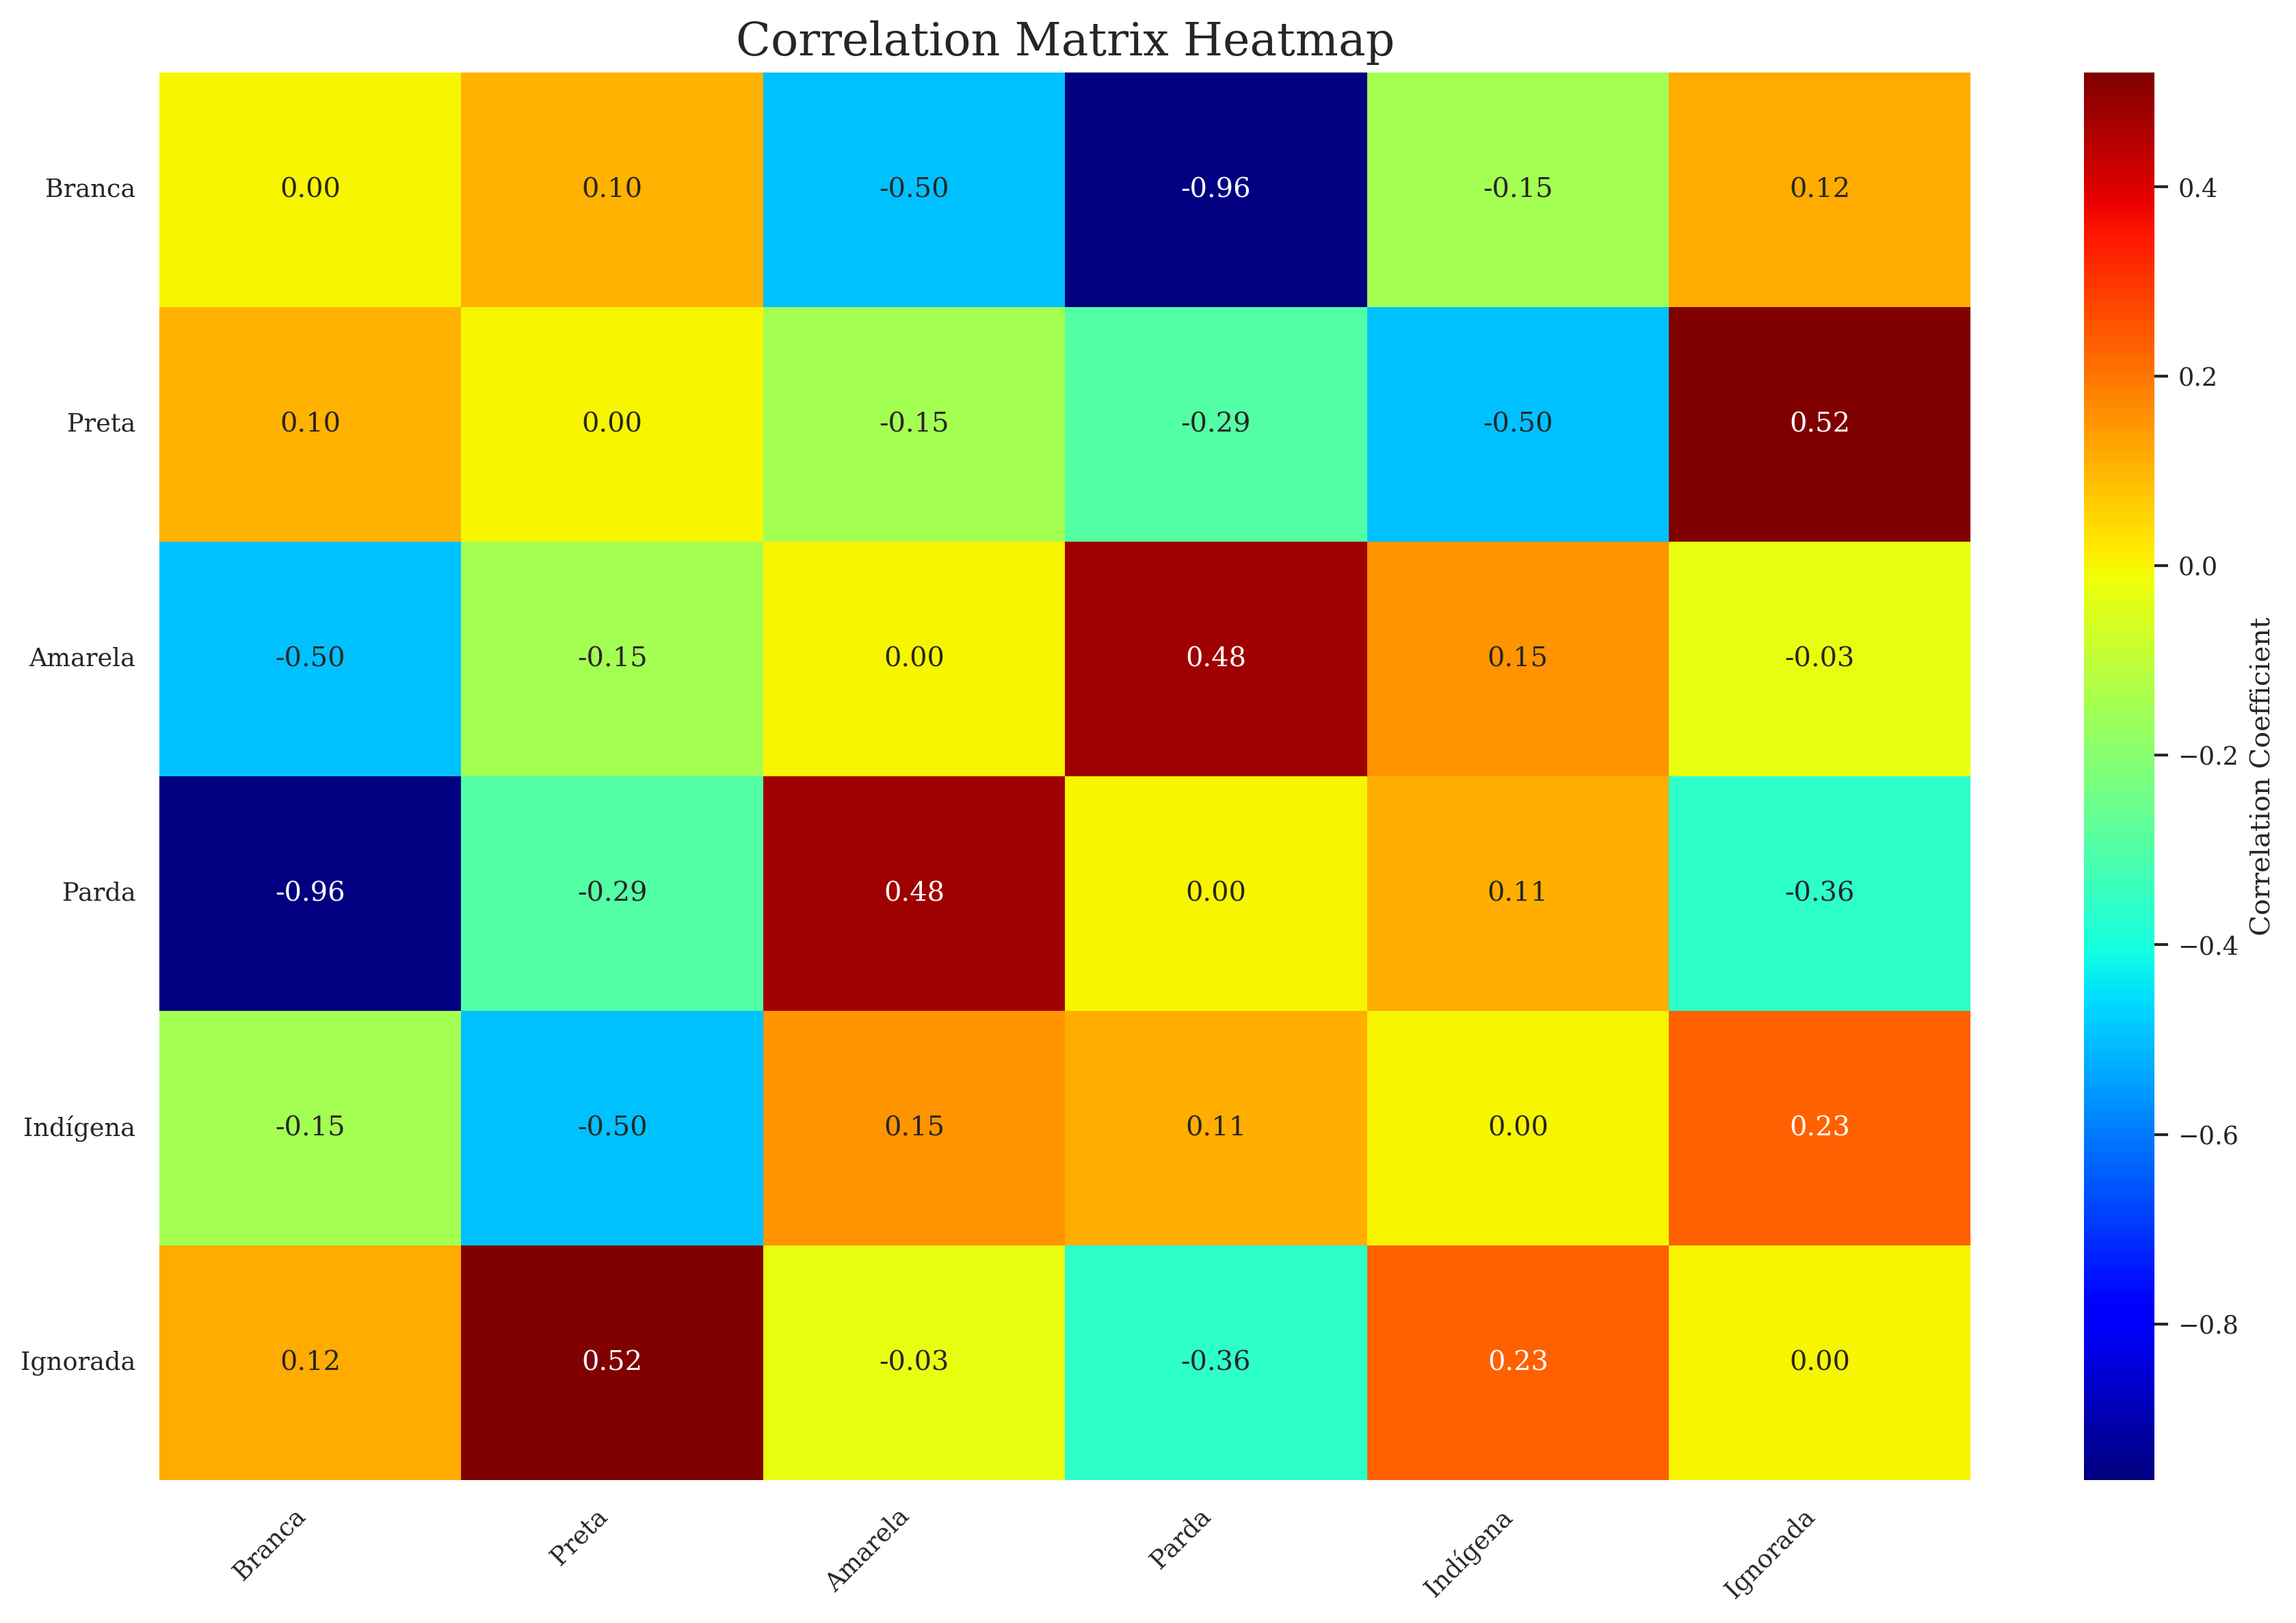

In [ ]:
#  Assuming df_data is already defined and contains the necessary columns
df_data = df.iloc[:, :-1]

# Compute the correlation matrix
correlation_matrix = df_data.corr()
correlation_matrix[correlation_matrix == 1] = 0

# Set up the figure size for better readability
plt.figure(figsize=(12, 8))

# Create a heatmap with values inserted into the cells and using 'jet' colormap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='jet',
            cbar_kws={'label': 'Correlation Coefficient'},
            xticklabels=df_data.columns, yticklabels=df_data.columns)

# Add titles and labels for clarity
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Display the plot
plt.tight_layout()
plt.show()


From the correlation matrix, we observe that 'Parda' and 'Branca' are highly correlated features, indicating that they share a lot of information. Therefore, in terms of feature importance, the next most significant feature is 'Preta'—the exact feature we had selected heuristically! This confirms that the method aligns well with our expectations.

### Dimensionality Reduction Using PCA

In this section, we will apply Principal Component Analysis (PCA) to perform dimensionality reduction on the dataset we previously explored. PCA is a powerful technique that transforms the data into a new coordinate system, where the greatest variance by any projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on. This process helps in reducing the number of dimensions while retaining the most significant patterns in the data.

Our goal is to simplify the dataset by reducing its dimensionality, making it easier to visualize and interpret while preserving as much information as possible. We will focus on the first two principal components (PCs) since they capture the majority of the variance in the data.

Using these first two PCs, we will plot a scatter plot to visualize the data in this reduced space. This visualization will help us understand how the different categories and patterns are distributed, potentially revealing new insights or confirming patterns observed in our initial feature exploration.

Let's proceed with the implementation of PCA and examine the scatter plot using the first two principal components to see how well they represent the data.

Explained Variance Ratio: 0.9915277808607823


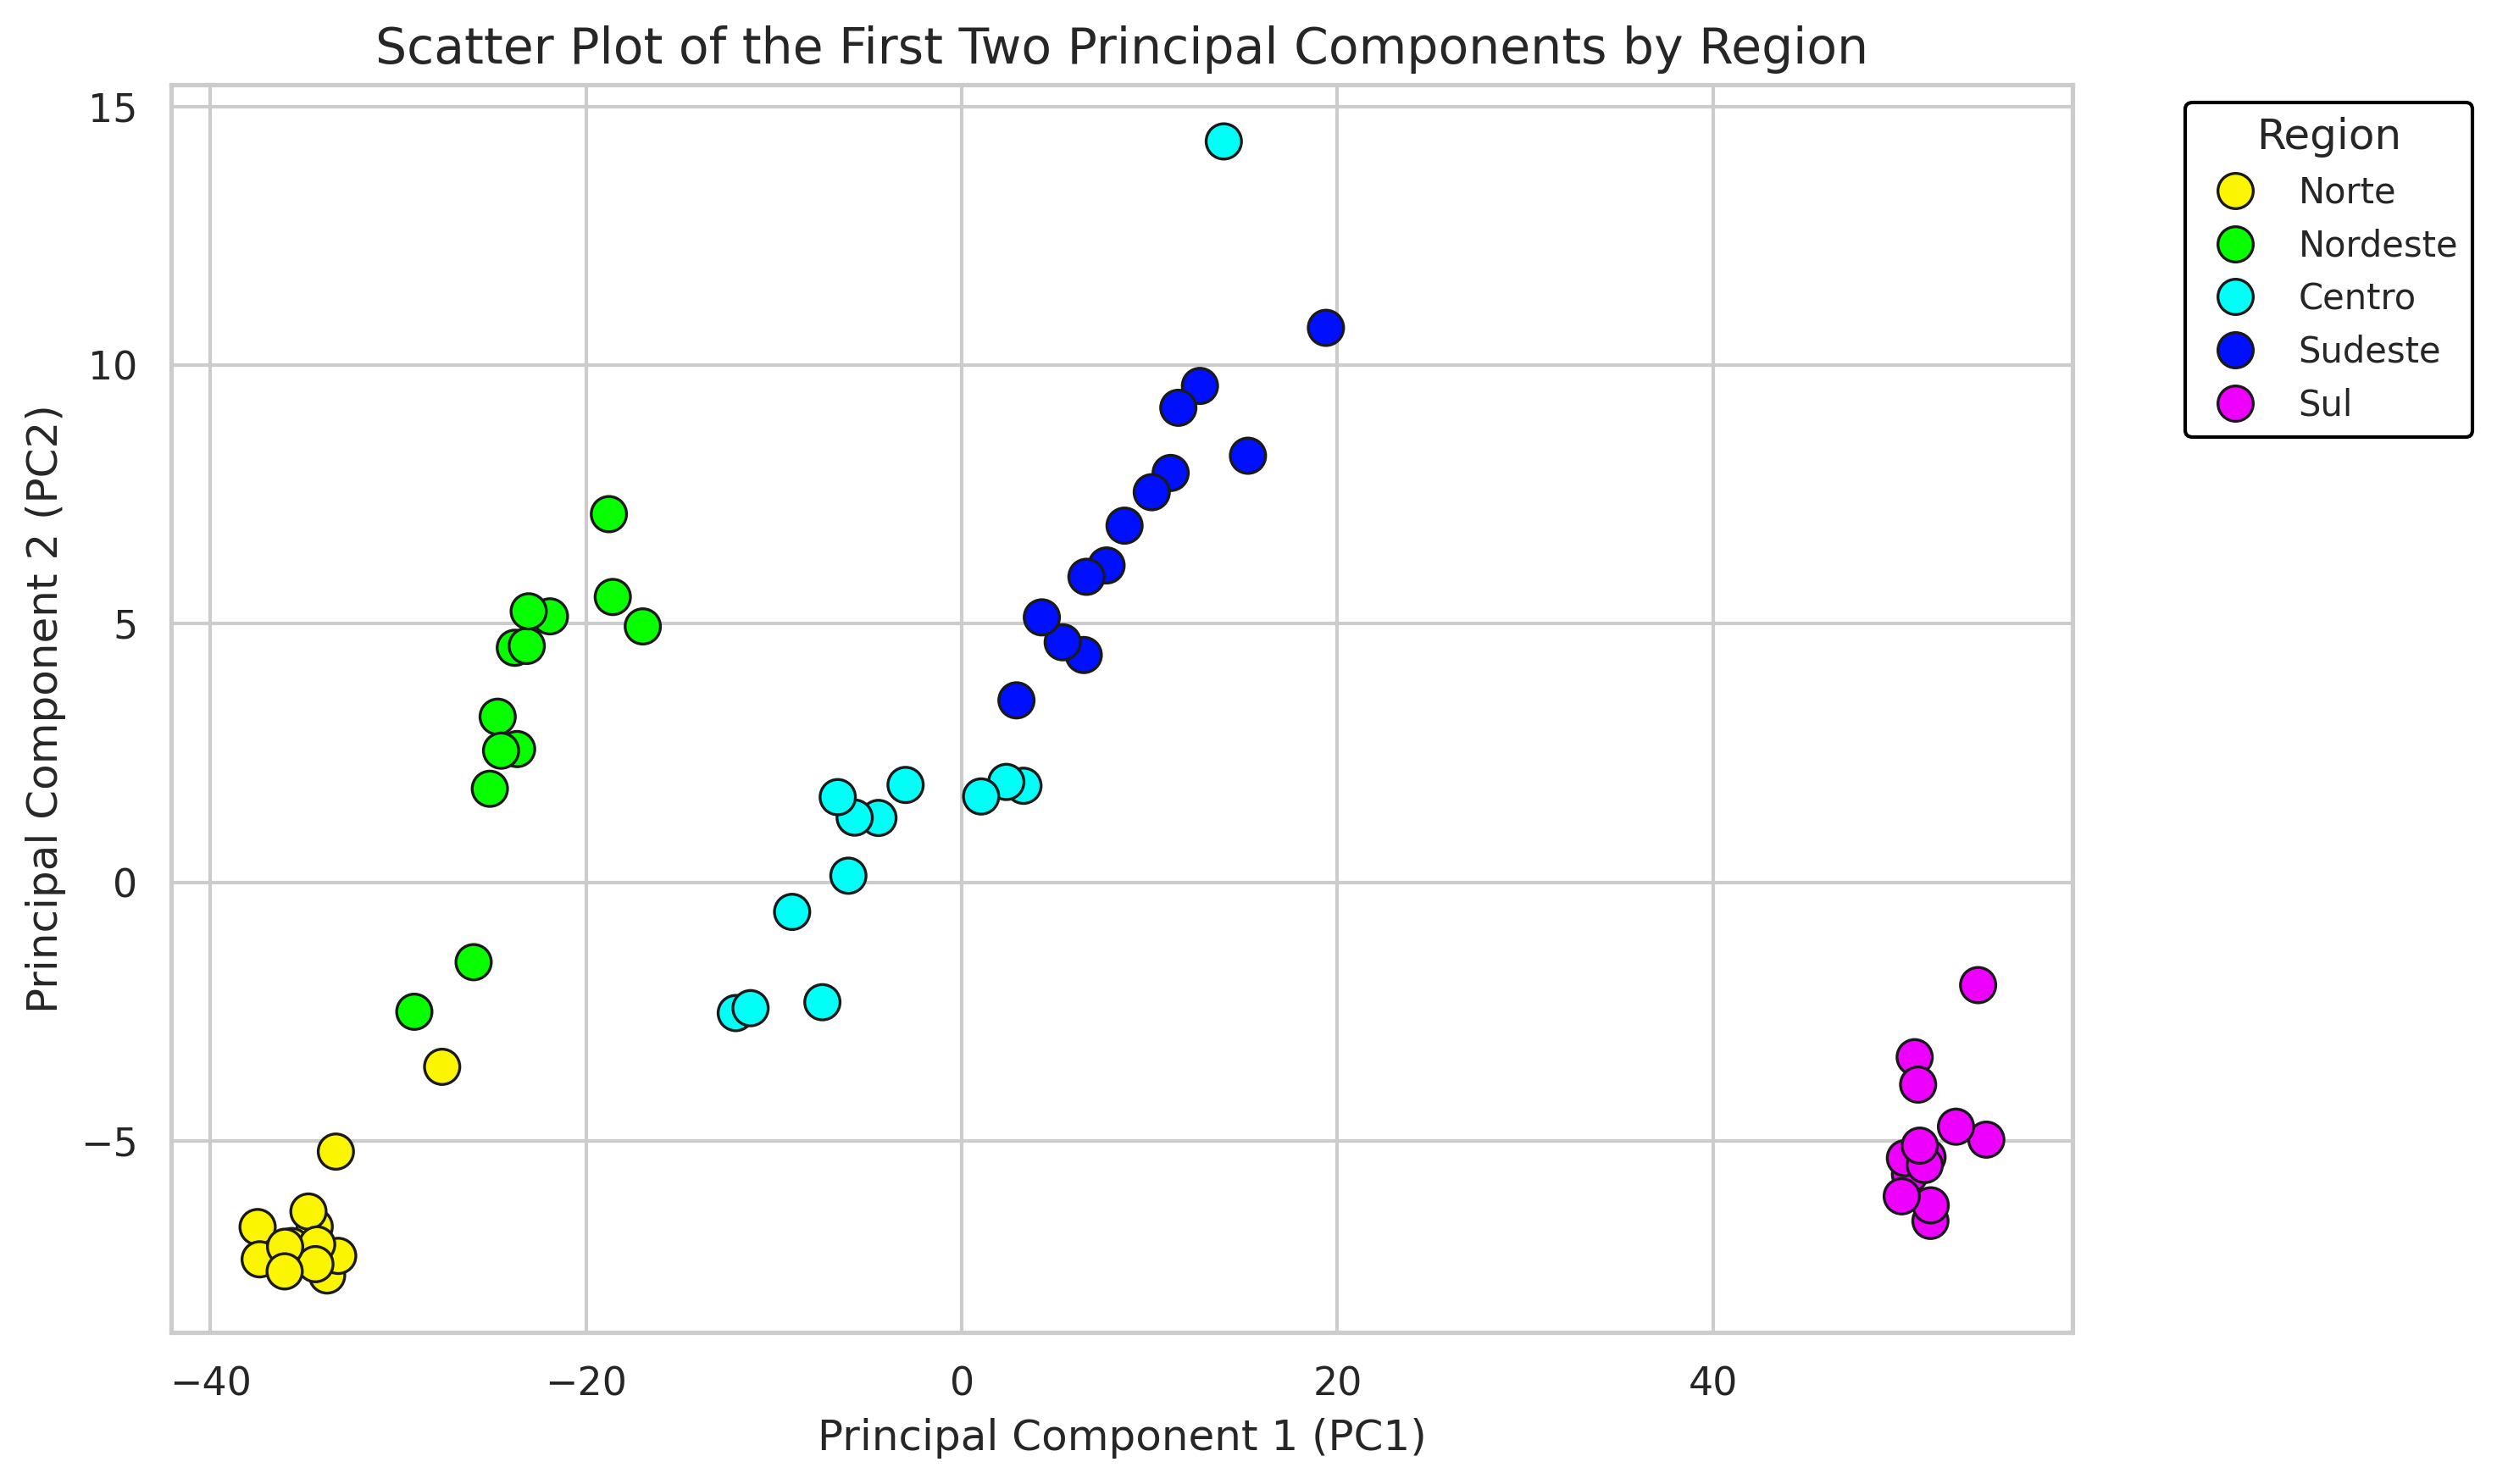

In [ ]:
from sklearn.decomposition import PCA

# Assuming df_data is already defined and contains the necessary columns
# Perform PCA on the data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_data)
var = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {np.sum(var)}")

# Create a new DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Region'] = df['Region']  # Add the Region column to the PCA results

# Plotting the scatter plot for the first two principal components
plt.figure(figsize=(10, 6))
# sns.set(style="whitegrid")

# Scatter plot with PCA components, colored by 'Region'
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Region', palette='hsv', s=100, edgecolor='k')

# Set plot labels and title
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.title('Scatter Plot of the First Two Principal Components by Region', fontsize=14)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


Ummm, again, I expected better results. Lets see another option.

Explained Variance Ratio: 0.9835654217846459


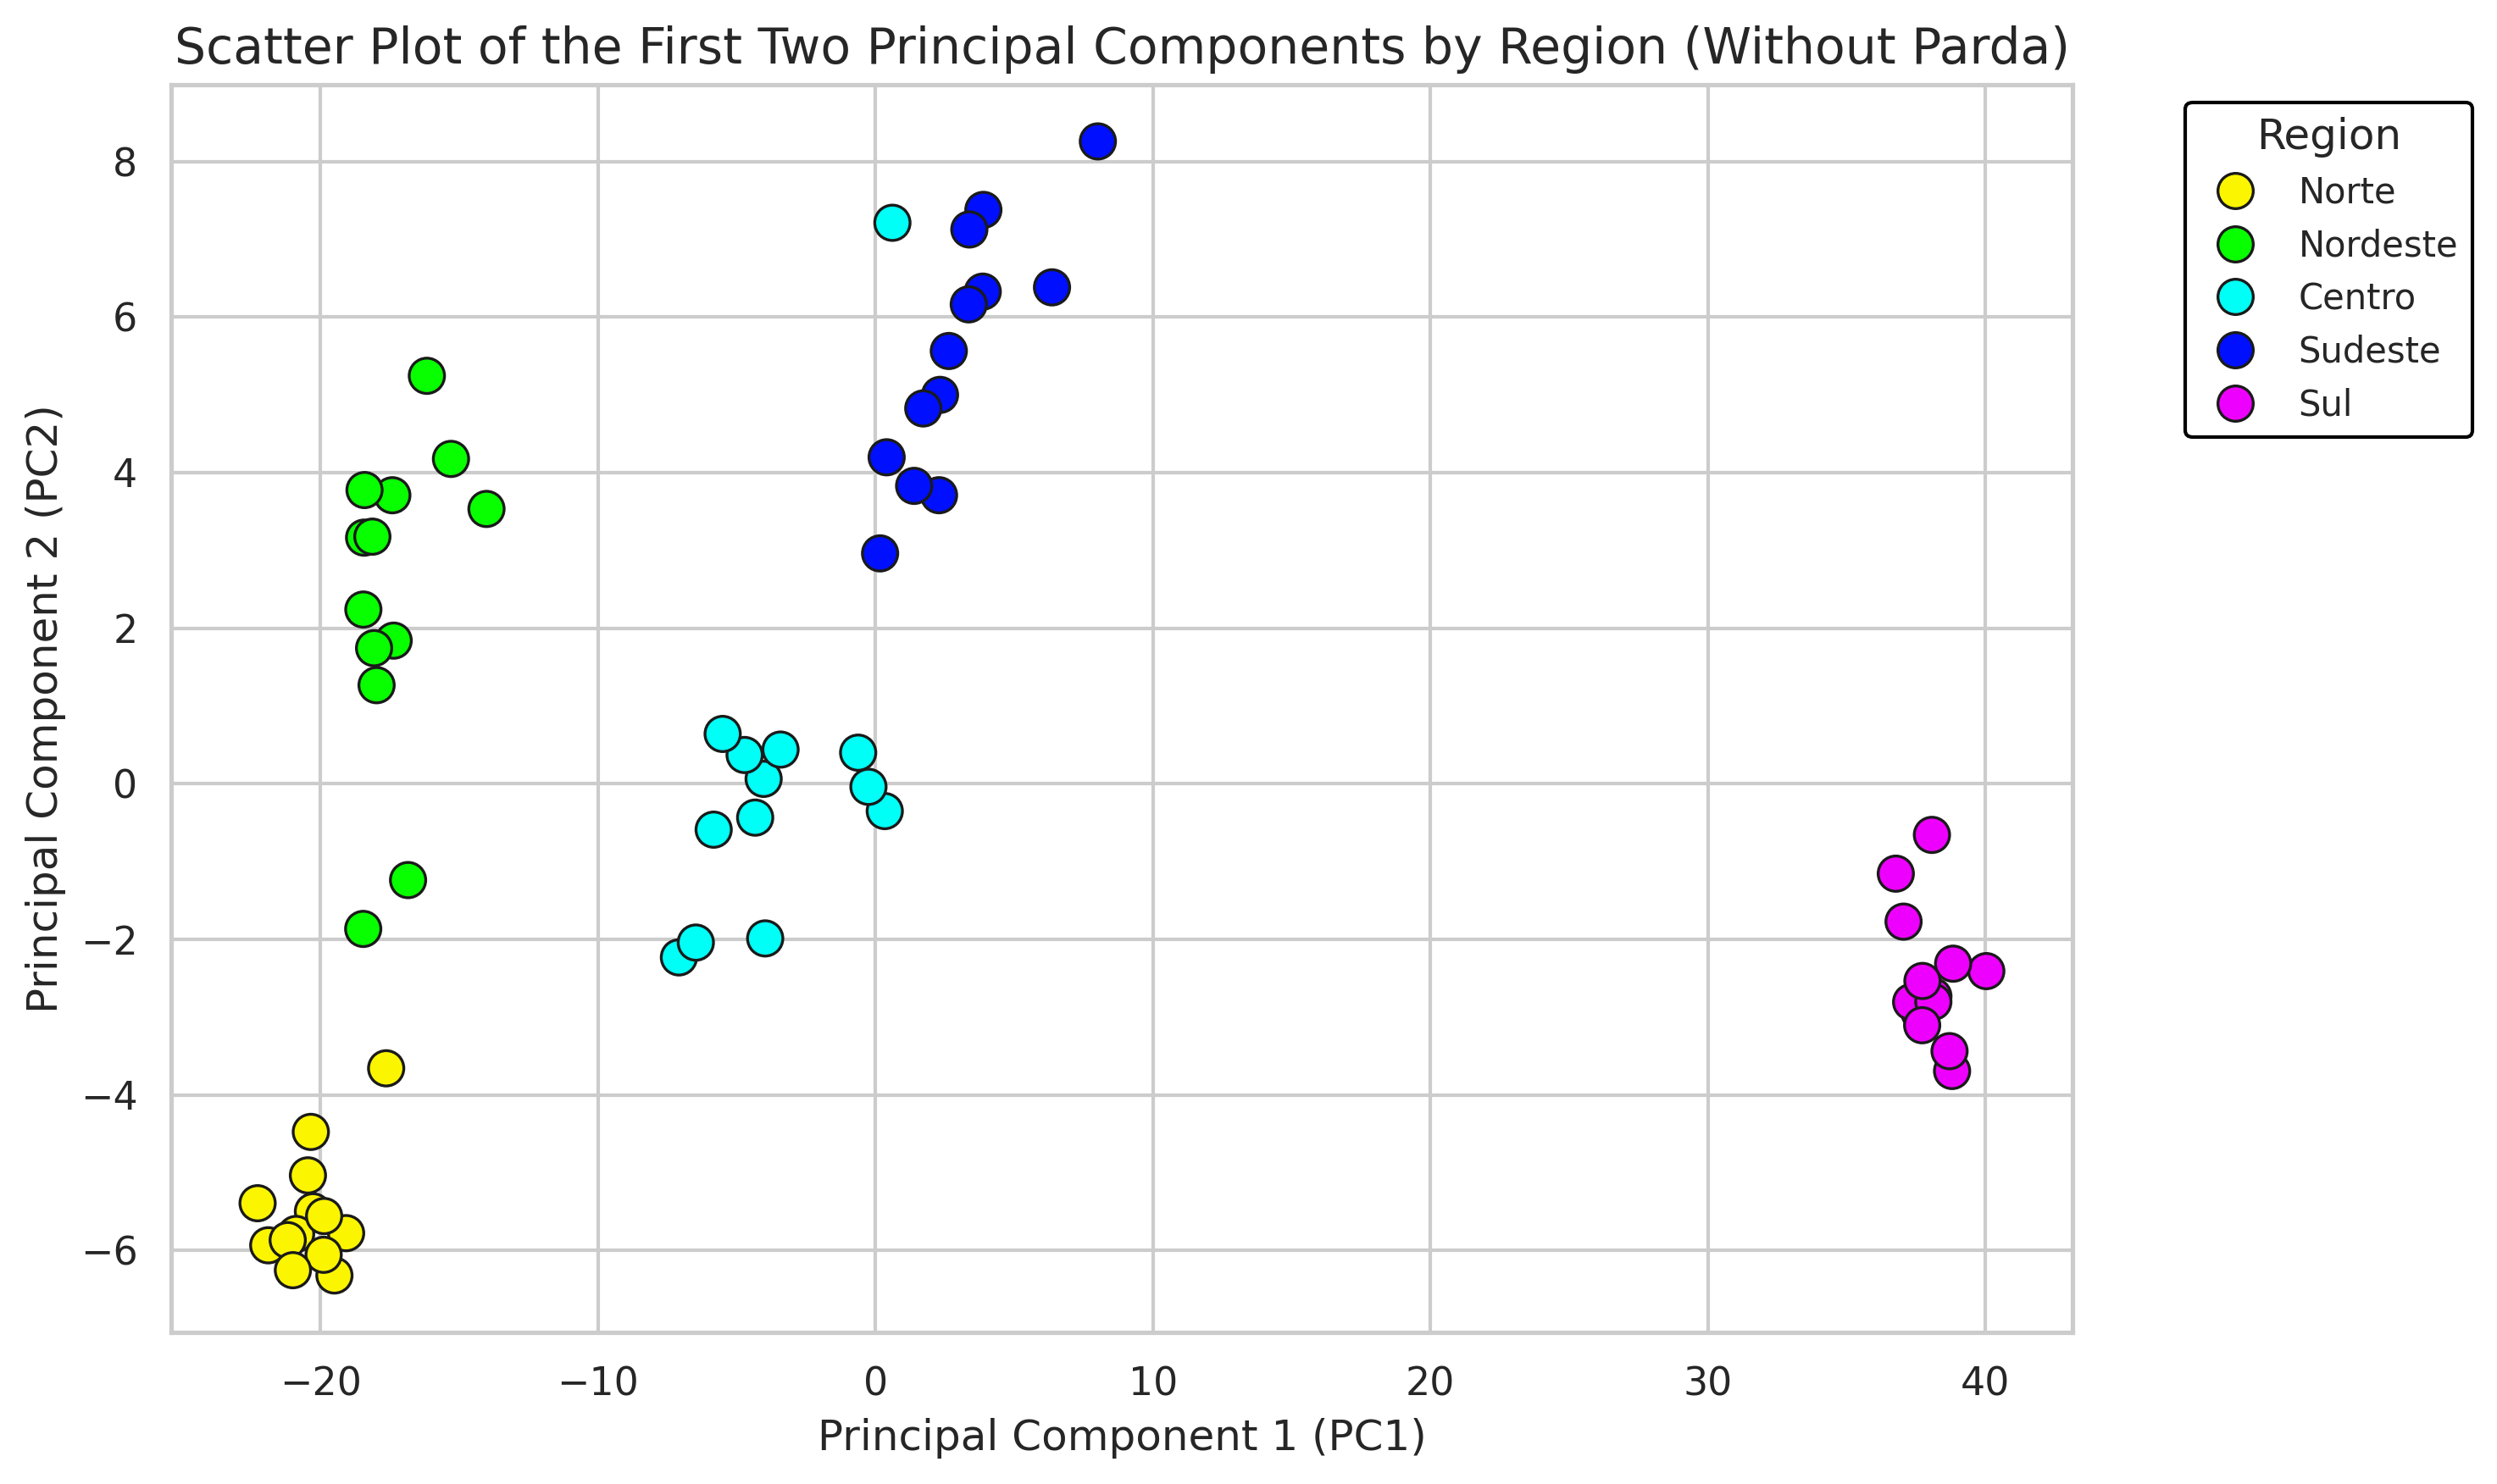

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Remove 'Parda' from df_data
df_data_reduced = df_data.drop(columns=['Parda'])

# Perform PCA on the modified data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_data_reduced)
var = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {np.sum(var)}")

# Create a new DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Region'] = df['Region']  # Add the Region column to the PCA results

# Plotting the scatter plot for the first two principal components
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Scatter plot with PCA components, colored by 'Region'
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Region', palette='hsv', s=100, edgecolor='k')

# Set plot labels and title
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.title('Scatter Plot of the First Two Principal Components by Region (Without Parda)', fontsize=14)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


## Part II: Clustering

### 1. Concepts
- **Introduction to Clustering:** Clustering is an unsupervised learning technique that involves grouping similar data points together based on their characteristics. The primary goal of clustering is to divide a dataset into distinct groups or clusters, such that data points within the same cluster are more similar to each other than to those in other clusters. Clustering is widely used in various fields, such as market segmentation, image analysis, biological data grouping, and more. It helps to uncover the inherent structure or patterns in data without prior knowledge of group labels.

### 2. Types of Clustering

#### - **Partitional Clustering**
  - **K-means Clustering:** K-means is one of the most popular partitional clustering algorithms. It partitions the data into \( K \) clusters by minimizing the variance within each cluster. The algorithm works by initializing \( K \) centroids (either randomly or using specific methods like K-means++), assigning each data point to the nearest centroid, and iteratively updating the centroids by computing the mean of the assigned points until convergence is reached. Convergence criteria typically involve checking if the centroids no longer move significantly or if a set number of iterations has been reached. It's important to explore the impact of different \( K \) values on the clustering results, as the choice of \( K \) directly affects the clustering outcome.

#### - **Hierarchical Clustering**
  - **Agglomerative Clustering:** Agglomerative clustering is a type of hierarchical clustering that builds nested clusters by progressively merging or splitting clusters based on a measure of dissimilarity. The process starts with each data point as its own cluster and merges the closest clusters iteratively until all data points belong to a single cluster or a desired number of clusters is reached. Various linkage methods, such as single-linkage (nearest point), complete-linkage (farthest point), and average-linkage (average distance), determine how the distance between clusters is calculated. The results of hierarchical clustering can be visualized using a dendrogram, which illustrates the merging process and helps in deciding the number of clusters by identifying natural breaks in the structure.

#### - **Density-Based Clustering**
  - **DBSCAN (Density-Based Spatial Clustering of Applications with Noise):** DBSCAN is a density-based clustering algorithm that identifies clusters based on the density of data points in the feature space. Unlike K-means, DBSCAN does not require the number of clusters to be specified beforehand. Instead, it relies on two parameters: epsilon (\(\epsilon\)), which defines the radius of the neighborhood around each data point, and min_samples, which defines the minimum number of points required to form a dense region. Points in dense regions form clusters, while points in sparse regions are classified as noise or outliers. DBSCAN is particularly effective at identifying clusters of varying shapes and sizes, as well as handling noise, but the choice of \(\epsilon\) and min_samples can significantly affect the clustering results.

This section will involve hands-on implementation of each clustering technique from scratch, exploring their mechanisms, advantages, and limitations, along with practical examples to visualize how data points are grouped under different methods.

Next, we continue with examples

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


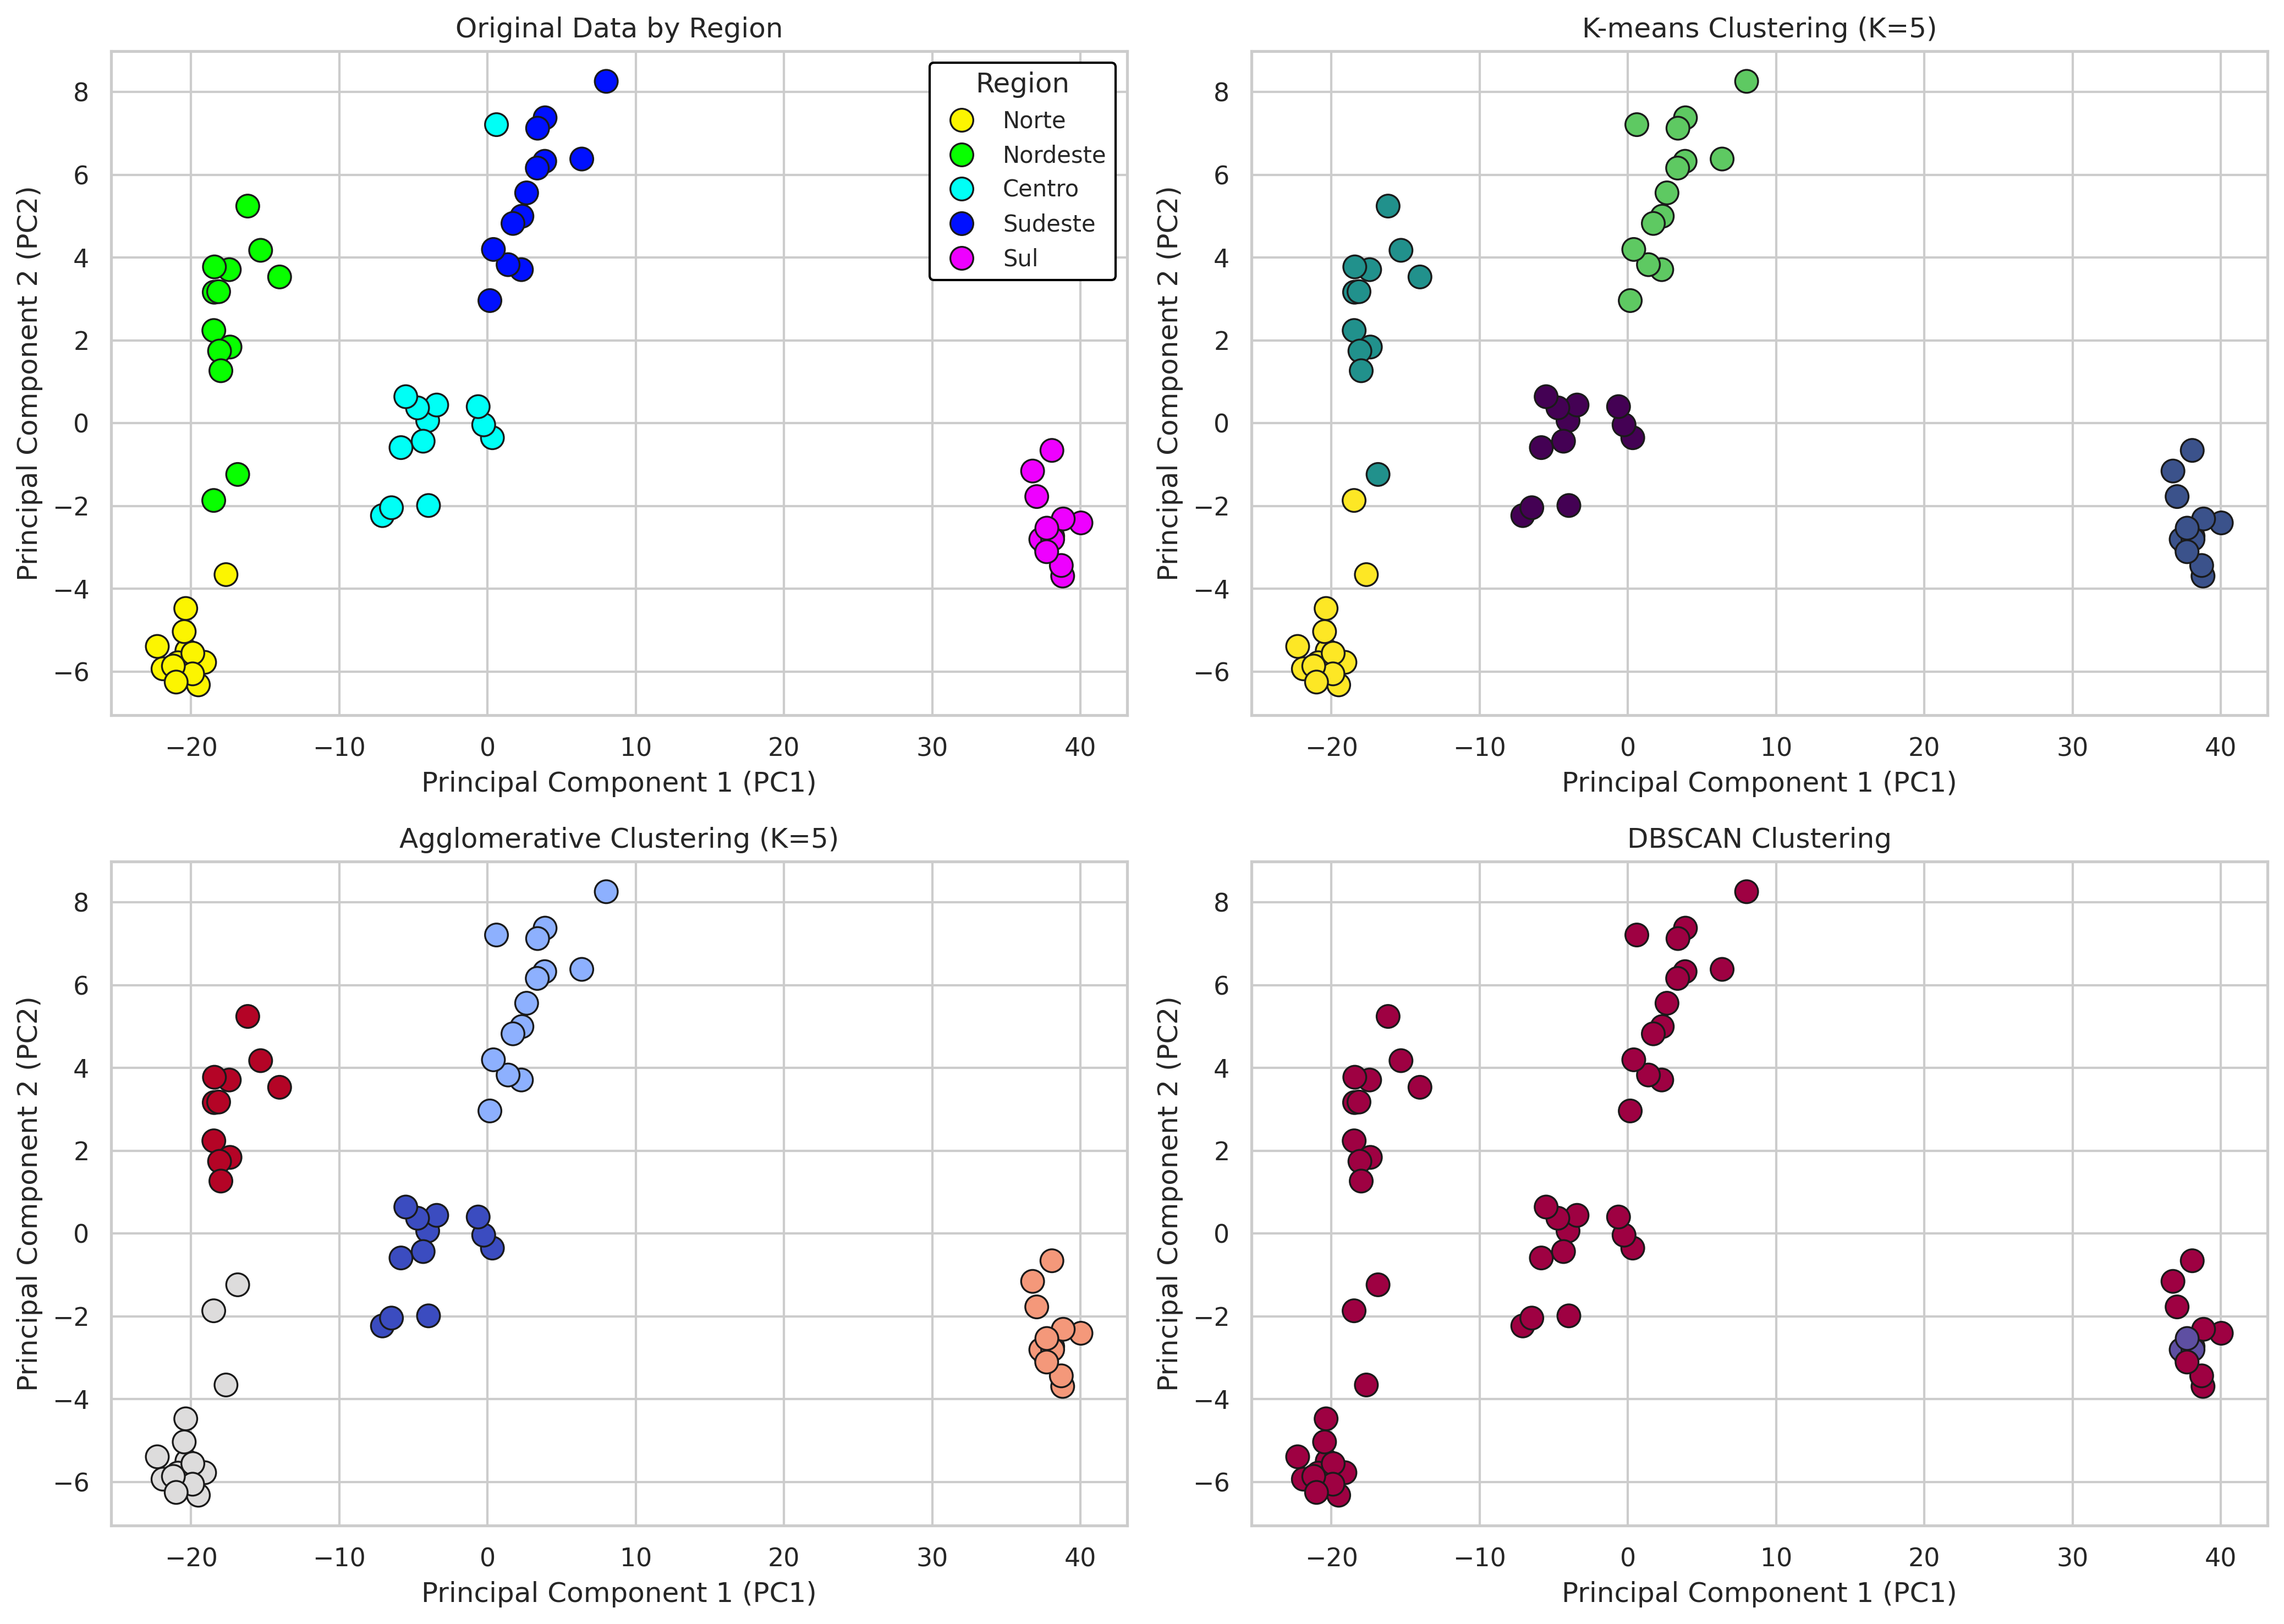

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Assuming pca_df is already defined and contains the PCA components and 'Region' column
# Extract PCA components for clustering
X = pca_df[['PC1', 'PC2']].values
# X = df_data[['Branca','Preta']].values

# Implement K-means Clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)
pca_df['KMeans'] = kmeans.fit_predict(X)

# Implement Agglomerative Clustering with 5 clusters
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
pca_df['Agglomerative'] = agg_clustering.fit_predict(X)

# Implement DBSCAN Clustering (parameters adjusted to suit 5 clusters, if applicable)
dbscan = DBSCAN(eps=0.5, min_samples=5)
pca_df['DBSCAN'] = dbscan.fit_predict(X)

# Plotting the scatter plots in a 2x2 grid
plt.figure(figsize=(14, 10))
# sns.set(style="whitegrid")

# Original Data Scatter Plot
plt.subplot(2, 2, 1)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Region', palette='hsv', s=100, edgecolor='k')
plt.title('Original Data by Region')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Region', loc='upper right', fontsize=10, title_fontsize=12)

# K-means Clustering Scatter Plot
plt.subplot(2, 2, 2)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='KMeans', palette='viridis', s=100, edgecolor='k')
plt.title('K-means Clustering (K=5)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend([],[], frameon=False)  # Hide the legend

# Agglomerative Clustering Scatter Plot
plt.subplot(2, 2, 3)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Agglomerative', palette='coolwarm', s=100, edgecolor='k')
plt.title('Agglomerative Clustering (K=5)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend([],[], frameon=False)  # Hide the legend

# DBSCAN Clustering Scatter Plot
plt.subplot(2, 2, 4)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='DBSCAN', palette='Spectral', s=100, edgecolor='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend([],[], frameon=False)  # Hide the legend

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


## Introduction to the next class

In the next class, we will shift our focus from clustering to classification, an equally important and powerful aspect of machine learning. We'll dive into the fundamentals of classification, starting with one of the simplest yet highly effective algorithms: **K-Nearest Neighbors (KNN)**.

Classification is all about assigning labels to data points based on their features, and KNN provides a straightforward way to do this by comparing each point to its neighbors. We'll explore how KNN works, its underlying principles, and why it is often used as a baseline in many classification tasks.

You'll learn about the parameters of KNN, such as the number of neighbors $k$ and the type of distance metric, can significantly influence the performance of the algorithm. We'll discuss practical examples to see how KNN can be applied to real-world data, just like the clustering techniques we've explored today.

By understanding KNN, you will gain insights into the broader field of classification, which is essential for tasks such as diagnosing diseases, categorizing emails as spam or not, and even more complex decisions in AI-driven applications. This will set the stage for deeper dives into more advanced classification algorithms in future sessions.